## Luciano de Araújo Lira

##  Neste notebook, serão analisados os filmes do MovieLens. Aprofundando nas categorias de filmes, as análises serão baseadas nas variáveis notas, ano de lançamento, gêneros e total de votos.
## Além de análises descritivas, serão utilizados testes estatísticos.

## Formação Data Science Alura - Análise exploratória do MovieLens

Na formação de Data Scienda www.alura.com.br um dos conjuntos de dados que utilizamos é o de avaliações para filmes no site MovieLens. Neste projeto faremos uma análise exploratória desses dados.

### Dicas para o projeto completo:

- todo gráfico deve ter um título, labels e legendas que fazem sentido
- configure um tamanho adequado para os gráficos
- utilize as versões dos arquivos de dados disponíveis no github

## Pergunta: conferindo as versões utilizadas

- Devemos usar pandas 0.24.0 ou mais recente
- Devemos usar seaborn 0.9.0 ou mais recente
- Devemos usar scipy 1.2.0 ou mais recente

In [1]:
#!pip install pandas=="0.24.0" --quiet
#!pip install seaborn=="0.9.0" --quiet
#!pip install scipy=="1.2.0" --quiet

Eu estava tendo problemas com este comando, então desativei. Mas as bibliotecas são as mais recentes.

In [2]:
import pandas as pd
import seaborn as sns
import scipy

print("Usando pandas %s" % pd.__version__)
print("Usando seaborn %s" % sns.__version__)
print("Usando scipy %s" % scipy.__version__)

Usando pandas 1.0.5
Usando seaborn 0.10.1
Usando scipy 1.4.1


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Pergunta: carregue os filmes

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv` devem ser carregado em `filmes`
- renomeie as colunas para `filmeId`, `titulo` e `generos`
- configure o indice (`index`) para ser o `filmeId`

In [3]:
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv")

In [4]:
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
print("Carregamos %d filmes" % len(filmes))
if(len(filmes) != 9742):
    print("ERRO! O conjunto de dados que estamos trabalhando nesse projeto possui 9742 elementos.")

Carregamos 9742 filmes


In [6]:
#Renomeando as colunas filmeId, titulo e generos
filmes.columns = ['filmeId', 'titulo', 'generos'] 

In [7]:
#Definindo filmeId como index
filmes.set_index(filmes.filmeId, drop=True, inplace=True)

#Excluindo a coluna
filmes = filmes.drop(["filmeId"], axis = 1)

Vamos extrair o ano dos filmes (código já pronto): 

In [8]:
ano_de_lancamento = filmes.titulo.str.extract("\((\d{4})\)")
filmes['ano_de_lancamento'] = ano_de_lancamento.astype(float)
filmes.head()

,titulo,generos,ano_de_lancamento
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
5,Father of the Bride Part II (1995),Comedy,1995.0


## Pergunta: carregando as notas

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv` devem ser carregado em `notas`
- renomeie as colunas para `usuarioId`, `filmeId`, `nota` e `momento`

In [9]:
notas = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv")

In [10]:
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [11]:
#Renomeando as colunas
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]

## Pergunta: gere uma nova feature, a média dos votos por filme

- crie uma nova coluna chamada `nota_media` dentro do dataframe `filmes`

Dicas:
- como filmeId já é o indice de seu dataframe filmes, se você possui uma série com o número de votos por filme, basta atribuir uma nova coluna normalmente que será usado o mesmo índice

In [12]:
#Criando uma series com o valor da média para cada filme
notas.groupby("filmeId")["nota"].mean()


filmeId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64

In [13]:
#Adicionando as médias ao dataframe filmes
filmes["nota_media"] = notas.groupby("filmeId")["nota"].mean()
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,2.357143
5,Father of the Bride Part II (1995),Comedy,1995.0,3.071429


## Pergunta: remova os filmes com menos de 50 avaliações

- conte o número de notas por filme
- adicione uma coluna nova chamada `total_de_votos` a `filmes` que representa o número de avaliações que aquele filme teve no conjunto de dados
- remova os que tem 49 ou menos de `filmes`

## Solução

In [14]:
#Criando a series com a quantidade de notas por filme
notas.groupby("filmeId")["nota"].count()

filmeId
1         215
2         110
3          52
4           7
5          49
         ... 
193581      1
193583      1
193585      1
193587      1
193609      1
Name: nota, Length: 9724, dtype: int64

In [15]:
#Adicionando a series ao dataframe
filmes["total_de_votos"] = notas.groupby("filmeId")["nota"].count()
filmes.head()


,titulo,generos,ano_de_lancamento,nota_media,total_de_votos
filmeId,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818,110.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615,52.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,2.357143,7.0
5,Father of the Bride Part II (1995),Comedy,1995.0,3.071429,49.0


In [16]:
#Filtrando o dataframe com os filmes que tenham mais de 50 votos
filmes = filmes.query("total_de_votos >= 50")

In [17]:
filmes["total_de_votos"].describe()[3]

50.0

# Visualizando os dados gerais

## Pergunta: Visualize as notas médias

- histograma
- cummulative distribution function

Dicas:

- lembre-se de colocar um título nas imagens além de nomes nos eixos x e y
- para gerar a versão cumulativa lembre-se de usar os parâmetros `hist_kws` e `kde_kws` para definir `'cumulative'=True`

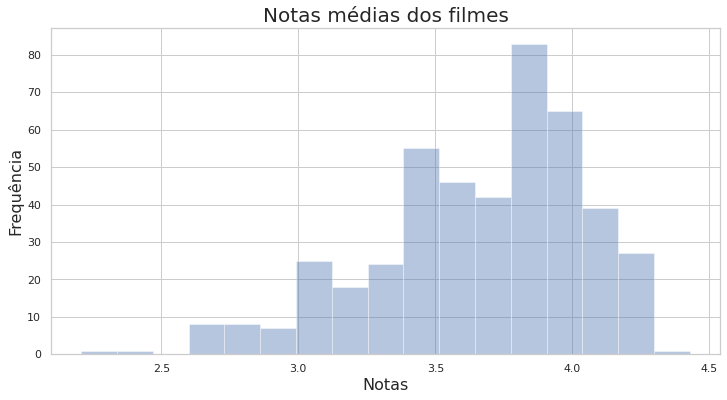

In [18]:
#Histograma com as quantidades 
sns.set(style="whitegrid")
ax = sns.distplot(filmes.nota_media, norm_hist=False, kde=False)
ax.figure.set_size_inches(12, 6)
ax.set_title('Notas médias dos filmes', fontsize=20)
ax.set_xlabel('Notas', fontsize=16)
ax.set_ylabel('Frequência', fontsize=16)
ax

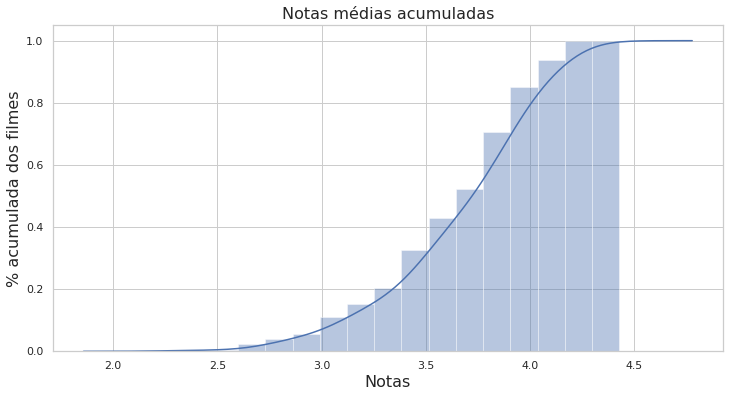

In [19]:
#Distribuição acumulada
sns.set(style="whitegrid")
ax = sns.distplot(filmes.nota_media, hist_kws = {"cumulative": True},
                  kde_kws = {"cumulative": True})
ax.figure.set_size_inches(12, 6)
ax.set_xlabel('Notas', fontsize=16)
ax.set_ylabel('% acumulada dos filmes', fontsize=16)
ax.set_title("Notas médias acumuladas", fontsize = 16)
ax

## Pergunta: Visualize o total de votos

- histograma
- cummulative distribution function

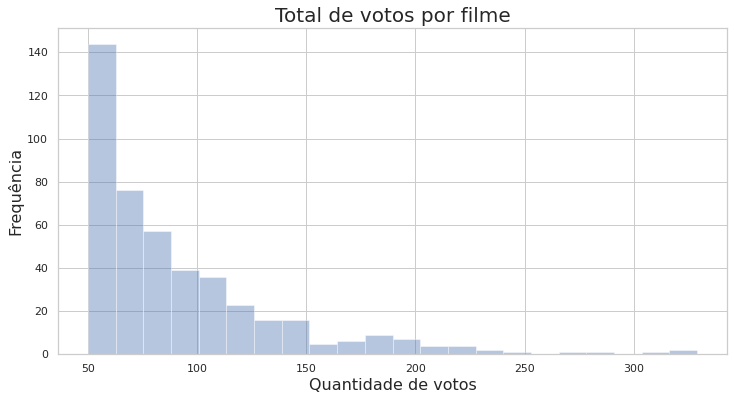

In [20]:
#Histograma com a quantidade
sns.set(style="whitegrid")
ax = sns.distplot(filmes.total_de_votos, norm_hist=False, kde=False)
ax.figure.set_size_inches(12, 6)
ax.set_title('Total de votos por filme', fontsize=20)
ax.set_xlabel('Quantidade de votos', fontsize=16)
ax.set_ylabel('Frequência', fontsize=16)
ax


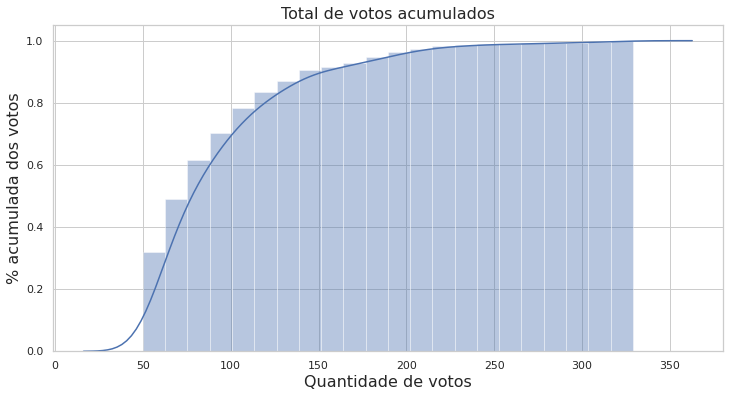

In [21]:
#Distribuição acumulada
sns.set(style="whitegrid")
ax = sns.distplot(filmes.total_de_votos, hist_kws = {"cumulative": True},
                  kde_kws = {"cumulative": True})
ax.figure.set_size_inches(12, 6)
ax.set_xlabel('Quantidade de votos', fontsize=16)
ax.set_ylabel('% acumulada dos votos', fontsize=16)
ax.set_title("Total de votos acumulados", fontsize = 16)
ax


## Pergunta: 20% dos filmes do dataframe tem nota maior que? 

- lembre-se da função `quantile` do pandas

In [22]:
#Criando variável com o quantil 0.8
nota_limite_dos_20_porcento = notas.nota.quantile(q = 0.8)

In [30]:
print("20 por cento dos filmes tem nota maior que de %.2f" % nota_limite_dos_20_porcento)

20 por cento dos filmes tem nota maior que de 4.50


## Vamos separar a coluna `generos` em diversas colunas.

- O código já está pronto.

In [31]:
filmes['generos'] = filmes['generos'].str.replace('-', '')
generos = filmes['generos'].str.get_dummies()
print("Temos %d generos distintos" % generos.shape[1])

Temos 19 generos distintos


In [32]:
filmes = filmes.join(generos).drop(columns=['generos'], axis=1)
filmes.head()

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995.0,3.920930,215.0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),1995.0,3.431818,110.0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),1995.0,3.259615,52.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6,Heat (1995),1995.0,3.946078,102.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
7,Sabrina (1995),1995.0,3.185185,54.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


## Pergunta: visualização de quantos filmes existem por genero

- Para cada um dos generos você deve agrupar o número de filmes
- Ordene as barras, na esquerda o genero com mais filmes, na direita o que tem menos filmes

Dica:

- Para fazer a soma de uma ou mais colunas individualmente você pode usar `seu_dataframe.sum()`
- Não precisa usar o dataframe `filmes`, somente o dataframe `generos`
- Em certas situações é mais fácil usar as funções de plotagem do pandas ao invés do seaborn

In [33]:
#Criando um dataframe com a contagem dos filmes por gêneros
generos_contagem_filmes = pd.DataFrame(generos.sum(), columns= ["Contagem"])

In [34]:
#Criando uma variável para ordenar a contagem
ordem = generos.sum().sort_values(ascending = False)
ordem

Comedy         181
Drama          166
Action         164
Adventure      132
Thriller       121
SciFi           92
Crime           87
Romance         85
Fantasy         66
Children        47
Mystery         38
Animation       32
IMAX            28
Horror          26
Musical         21
War             19
Western         12
FilmNoir         4
Documentary      2
dtype: int64

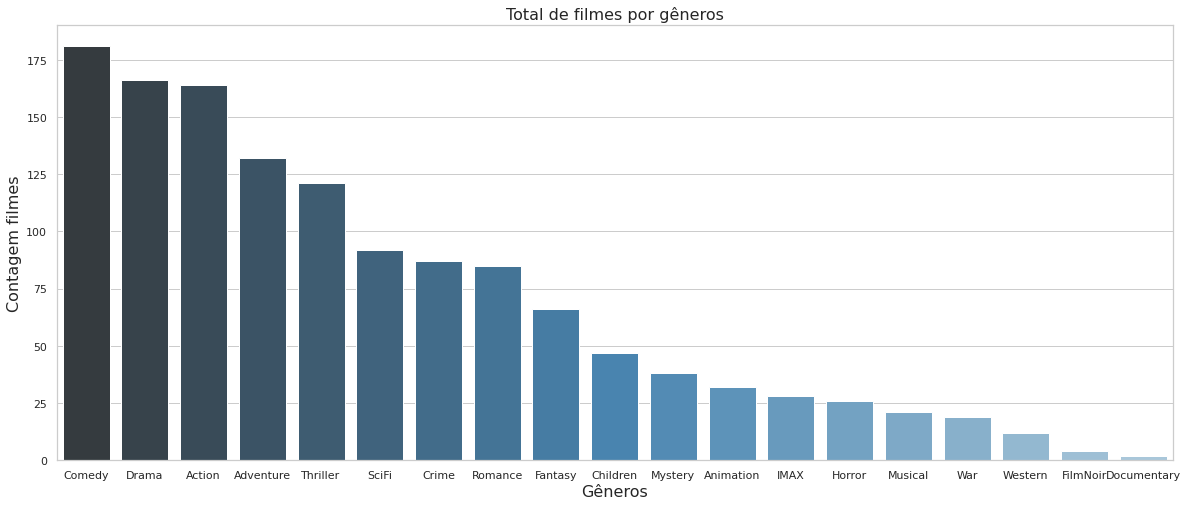

In [35]:
#Gráfico de barras em ordem
sns.set(style="whitegrid")
ax = sns.barplot(data = generos_contagem_filmes.reset_index(), x = 'index', y = 'Contagem',
            palette = "Blues_d", order = ordem.index)

ax.figure.set_size_inches(20, 8)
ax.set_xlabel('Gêneros', fontsize=16)
ax.set_ylabel('Contagem filmes', fontsize=16)
ax.set_title("Total de filmes por gêneros", fontsize = 16)
ax

## Pergunta: Quais são os 5 generos com mais filmes?

Dica:

- `sort_values()` pode ordenar uma Series do pandas

In [36]:
#Variável com os 5 gêneros com mais filmes
top5_generos_em_quantidade_de_filmes = ordem[0:5]

In [42]:
pd.DataFrame(top5_generos_em_quantidade_de_filmes, columns=["Quantidade de filmes"])

,Quantidade de filmes
Comedy,181
Drama,166
Action,164
Adventure,132
Thriller,121


## Pergunta: visualização de votos por genero

- o código que gera os votos por genero já está pronto
- ordene as categorias da mais visualizada para a menos visualizada
- gere a visualização por genero

In [43]:
votos_por_genero_por_filme = pd.DataFrame((generos.values.T * filmes['total_de_votos'].values).T, columns = generos.columns)
votos_por_genero_por_filme.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,0.0,215.0,215.0,215.0,215.0,0.0,0.0,0.0,215.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,110.0,0.0,110.0,0.0,0.0,0.0,0.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0
3,102.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0
4,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0


In [44]:
# Ordenando as categorias da mais visualizada para a menos visualizadas
qtd_votos_genero = pd.DataFrame(votos_por_genero_por_filme.sum().sort_values(ascending = False), columns=["Votos"])
qtd_votos_genero

,Votos
Action,15734.0
Drama,15445.0
Comedy,15330.0
Adventure,13117.0
Thriller,11907.0
SciFi,8989.0
Crime,8649.0
Romance,7444.0
Fantasy,5993.0
Children,4331.0


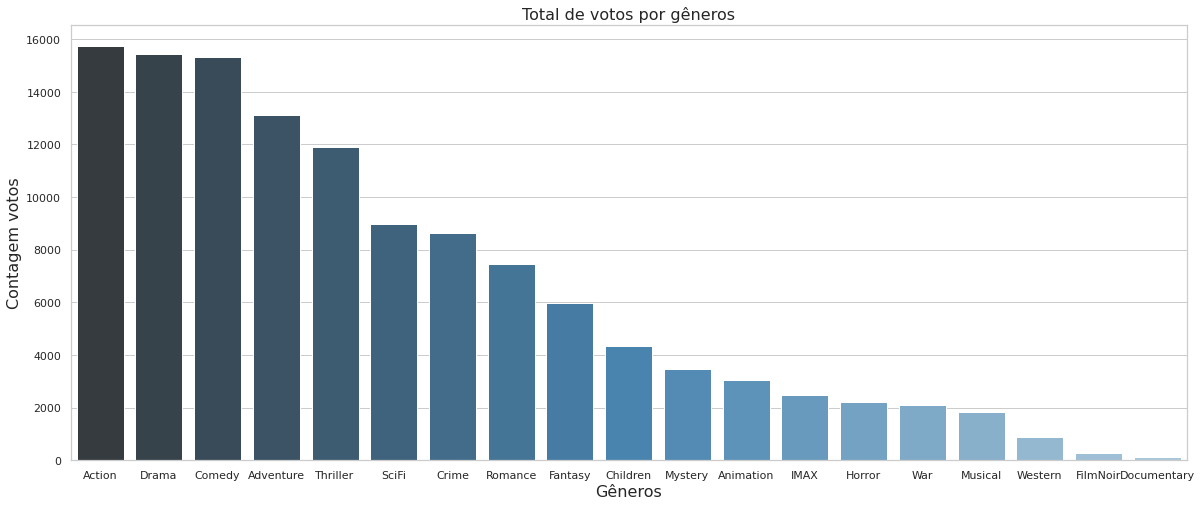

In [45]:
#Gráfico de barras em ordem
sns.set(style="whitegrid")

ax = sns.barplot(data = qtd_votos_genero.reset_index(), x = 'index', y = 'Votos',
            palette = "Blues_d")

ax.figure.set_size_inches(20, 8)
ax.set_xlabel('Gêneros', fontsize=16)
ax.set_ylabel('Contagem votos', fontsize=16)
ax.set_title("Total de votos por gêneros", fontsize = 16)
ax


## Pergunta : votos por filme por genero

Queremos entender a quantidade de votos em relação a quantidade de filmes existentes naquele genero.

Por exemplo: 
- se temos 1000 votos de `Ação` e 10 filmes desse genero, foram 100 votos por filme nesse genero.
- se o gênero `Documentário` tem 2 filmes e 500 votos, ele tem 250 votos por filme nesse gênero.

Queremos entender isso, a "popularidade" média de um filme em cada categoria, isto é, o número de votos dividido pelo número de filmes, organizado para cada categoria.

- Você já possui o número de votos por genero
- Calcule o número de votos por genero dividido pelo total de filmes por genero
- Ordene do maior para o menor
- Plote um gráfico para visualizarmos esses dados

In [46]:
#Juntando a quantidade de votos com a contagem de gêneros por filme
popularidade = qtd_votos_genero.join(generos_contagem_filmes)

In [47]:
#Criando uma nova coluna com a média entre votos e quantidade de filmes por gênero
popularidade["media"] = popularidade.Votos / popularidade.Contagem

#Ordenando em ordem decrescente de acordo com a media
popularidade.sort_values(by="media", ascending=False, inplace=True)
popularidade

,Votos,Contagem,media
War,2113.0,19,111.210526
Crime,8649.0,87,99.413793
Adventure,13117.0,132,99.371212
Thriller,11907.0,121,98.404959
SciFi,8989.0,92,97.706522
Action,15734.0,164,95.939024
Animation,3066.0,32,95.812500
Drama,15445.0,166,93.042169
Children,4331.0,47,92.148936
Mystery,3452.0,38,90.842105


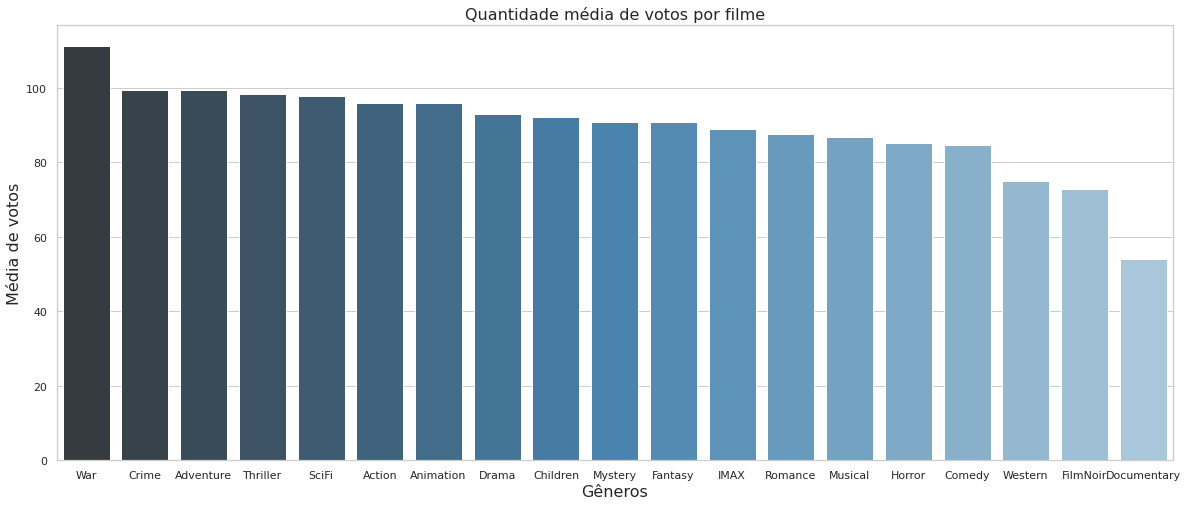

In [49]:
#Gráfico de barras
sns.set(style="whitegrid")
ax = sns.barplot(data = popularidade.reset_index(), x = 'index', y = 'media',
            palette = "Blues_d")

ax.figure.set_size_inches(20, 8)
ax.set_xlabel('Gêneros', fontsize=16)
ax.set_ylabel('Média de votos', fontsize=16)
ax.set_title("Quantidade média de votos por filme", fontsize = 16)
ax

## Pergunta: Olhando as 3 últimas visualizações o que você conclui sobre os generos `Action` e `War`?

### Action é o gênero com maior quantidade de votos no site e está entre as três categorias com mais filmes feitos. War é o gênero com a maior média de votos por filme, tendo em torno de 111 votos por filme. 
    
    

## Pergunta: Crie 2 boxplots no mesmo plot comparando a coluna `total_de_votos` dos filmes de categoria `Horror` e `Adventure`  

Dica:

- as vezes é mais fácil usar o boxplot do matplotlib ao invés do seaborn
- plt.boxplot suporta o parâmetro labels com uma lista de nomes para cada boxplot plotado

In [50]:
#Filtrando somente os filmes das categorias de Horror e Adventure
horror_adventure = filmes.query('Adventure == 1 or Horror == 1')

In [51]:
#Criando as variáveis para usar como boxplot no pyplot
boxplot_filmes_adventure = horror_adventure.query("Adventure == 1")
boxplot_filmes_horror = horror_adventure.query("Horror == 1")

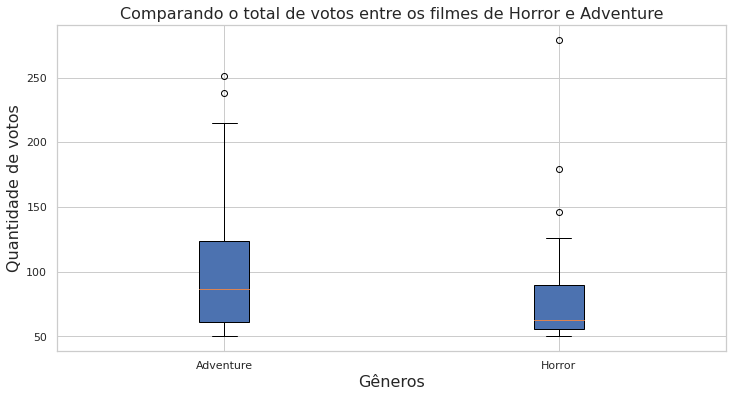

In [52]:
#Boxplot
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.boxplot([boxplot_filmes_adventure.total_de_votos, boxplot_filmes_horror.total_de_votos], labels = ["Adventure", "Horror"], patch_artist=True)

plt.title("Comparando o total de votos entre os filmes de Horror e Adventure", fontsize = 16)
plt.xlabel('Gêneros', fontsize=16)
plt.ylabel('Quantidade de votos', fontsize=16)

plt.show()

## Pergunta: mostre agora um boxplot para cada uma das categorias

Dica:
- use generos.columns para acessar todos os gêneros
- já removemos os hífens dos nomes das colunas quando criamos as colunas de gêneros
- plt (pyplot) do matplotlib suporta a função xticks(rotation=90) para rotacionar os labels

In [53]:
#Criando as variáveis para usar como boxplot no pyplot
boxplot_filmes_action = filmes.query("Action == 1")
boxplot_filmes_Animation = filmes.query("Animation == 1")
boxplot_filmes_Children = filmes.query("Children == 1")
boxplot_filmes_Comedy = filmes.query("Comedy == 1")
boxplot_filmes_Crime = filmes.query("Crime == 1")
boxplot_filmes_Documentary = filmes.query("Documentary == 1")
boxplot_filmes_Drama = filmes.query("Drama == 1")
boxplot_filmes_Fantasy = filmes.query("Fantasy == 1")
boxplot_filmes_FilmNoir = filmes.query("FilmNoir == 1")
boxplot_filmes_IMAX = filmes.query("IMAX == 1")
boxplot_filmes_Musical = filmes.query("Musical == 1")
boxplot_filmes_Mystery = filmes.query("Mystery == 1")
boxplot_filmes_Romance = filmes.query("Romance == 1")
boxplot_filmes_SciFi = filmes.query("SciFi == 1")
boxplot_filmes_Thriller = filmes.query("Thriller == 1")
boxplot_filmes_War = filmes.query("War == 1")
boxplot_filmes_Western = filmes.query("Western == 1")

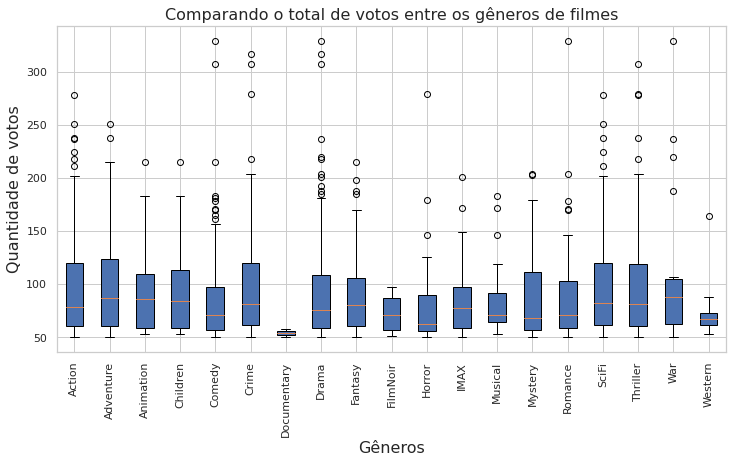

In [54]:
plt.figure(figsize=(12,6))
plt.boxplot([boxplot_filmes_action.total_de_votos, boxplot_filmes_adventure.total_de_votos, boxplot_filmes_Animation.total_de_votos, 
             boxplot_filmes_Children.total_de_votos, boxplot_filmes_Comedy.total_de_votos, boxplot_filmes_Crime.total_de_votos,
             boxplot_filmes_Documentary.total_de_votos, boxplot_filmes_Drama.total_de_votos, boxplot_filmes_Fantasy.total_de_votos,
             boxplot_filmes_FilmNoir.total_de_votos, boxplot_filmes_horror.total_de_votos, boxplot_filmes_IMAX.total_de_votos,
             boxplot_filmes_Musical.total_de_votos, boxplot_filmes_Mystery.total_de_votos, boxplot_filmes_Romance.total_de_votos,
             boxplot_filmes_SciFi.total_de_votos, boxplot_filmes_Thriller.total_de_votos, boxplot_filmes_War.total_de_votos,
             boxplot_filmes_Western.total_de_votos], 
            labels = generos.columns, patch_artist=True)

plt.title("Comparando o total de votos entre os gêneros de filmes", fontsize = 16)
plt.xlabel('Gêneros', fontsize=16)
plt.ylabel('Quantidade de votos', fontsize=16)
plt.xticks(rotation=90)

plt.show()

## Pergunta: desejo criar um filme com somente um dos gêneros: `Horror` ou `Adventure`. Quero ter uma chance maior de ter um faturamento que pague minhas contas, mesmo que não seja um super sucesso absurdo de vendas. Qual dos 2 gêneros você sugere?

### Solução: O gênero de Ação parece ser mais rentável, pois tem uma quantidade de votos total muito maior que Horror. Sendo assim, o público do gênero de ação é maior que o de horror. 
    


## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição dos votos dos filmes de `Adventure` e `Horror`. Sua recomendação continua a mesma? Explique.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

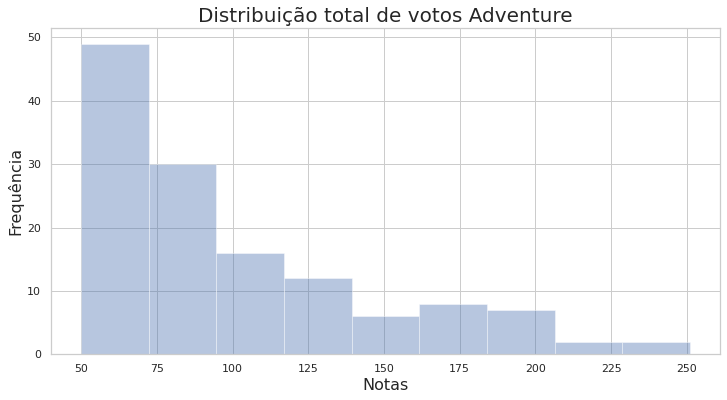

In [55]:
# solucao histograma de aventura
sns.set(style="whitegrid")
ax = sns.distplot(boxplot_filmes_adventure.total_de_votos, norm_hist=False, kde=False)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição total de votos Adventure', fontsize=20)
ax.set_xlabel('Notas', fontsize=16)
ax.set_ylabel('Frequência', fontsize=16)
ax

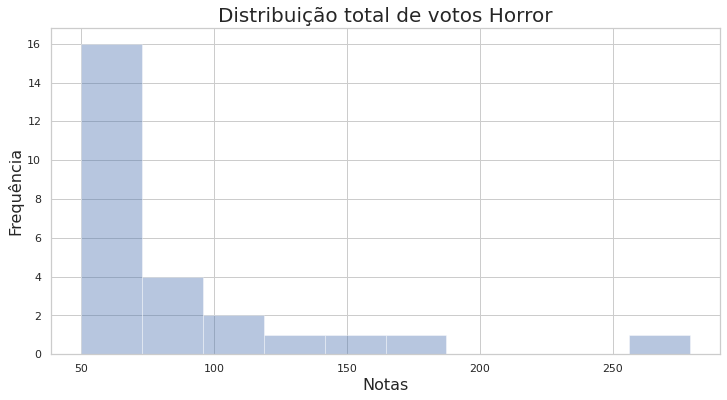

In [56]:
# solucao histograma de horror
sns.set(style="whitegrid")
ax = sns.distplot(boxplot_filmes_horror.total_de_votos, norm_hist=False, kde=False)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição total de votos Horror', fontsize=20)
ax.set_xlabel('Notas', fontsize=16)
ax.set_ylabel('Frequência', fontsize=16)
ax

In [57]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo
from scipy.stats import normaltest

_, p_valor_adventure = normaltest(boxplot_filmes_adventure.total_de_votos)
_, p_valor_horror = normaltest(boxplot_filmes_horror.total_de_votos)

print("P_valor gênero Aventura: ", p_valor_adventure)
print("P_valor gênero Horror: ", p_valor_horror)

P_valor gênero Aventura:  5.987863006199139e-06
P_valor gênero Horror:  1.2786148884334685e-07


### Rejeitamos a hipótese nula, analisando o p-valor, e utilizaremos uma teste não paramétrico, pois a amostra de filmes de horror é pequena.

In [58]:
# Utilizar o teste não paramétrico Mann Whitney para comparar duas amostras independentes
from scipy.stats import mannwhitneyu

_, p_valor = mannwhitneyu(boxplot_filmes_adventure.total_de_votos, boxplot_filmes_horror.total_de_votos, alternative = "greater")

print("P-valor: ", p_valor)

P-valor:  0.024013794111814445


### Ao nível de significância de 5%, rejeitamos a hipótese nula e concluímos que o total de votos do gênero de Aventura é maior que o total de votos do gênero de Horror.
### Tanto a análise gráfica como o teste nos mostram que teremos mais público fazendo um filme de Aventura.


## Pergunta: Faça os mesmos boxplots para as notas médias (`nota_media`) dos gêneros `Adventure` e `Horror`.

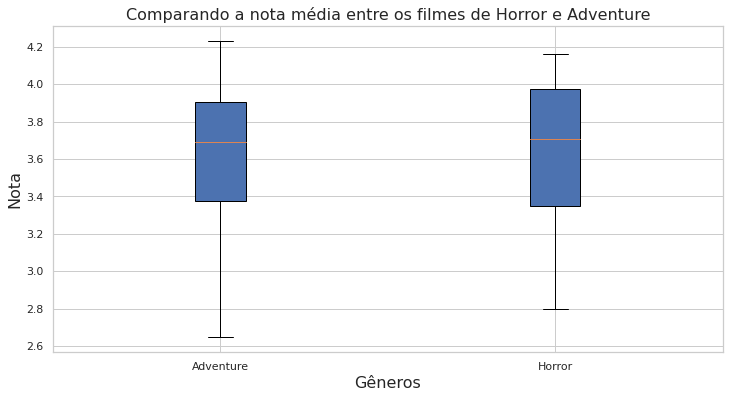

In [59]:
#Boxplot das notas médias
plt.figure(figsize=(12,6))
plt.boxplot([boxplot_filmes_adventure.nota_media, boxplot_filmes_horror.nota_media], labels = ["Adventure", "Horror"], patch_artist=True)

plt.title("Comparando a nota média entre os filmes de Horror e Adventure", fontsize = 16)
plt.xlabel('Gêneros', fontsize=16)
plt.ylabel('Nota', fontsize=16)

plt.show()

In [60]:
#Vusualizando as estatísticas descritivas dos gêneros Aventura e Horror 
aventura_stats = pd.DataFrame(boxplot_filmes_adventure.nota_media.describe().round(2))
aventura_stats.columns = ["Aventura"]

horros_stats = pd.DataFrame(boxplot_filmes_horror.nota_media.describe().round(2))
horros_stats.columns = ["Horror"]

stats = aventura_stats.join(horros_stats, how = "right")
stats

,Aventura,Horror
count,132.00,26.00
mean,3.62,3.61
std,0.39,0.42
min,2.65,2.80
25%,3.37,3.35
50%,3.69,3.71
75%,3.90,3.97
max,4.23,4.16


## Pergunta: Quero fazer um filme que seja sucesso de crítica, com pessoas dando notas altas, mesmo que não tenha um número muito grande de pessoas assistindo. Qual gênero você recomenda se tenho que escolher somente um entre `Adventure` e `Horror`?

### Ainda recomendaria o gênero de Aventura. Os dois possuem notas parecidas, mas as notas de Aventura estão mais concentradas.



## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição das notas dos filmes de `Adventure` e `Horror`.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

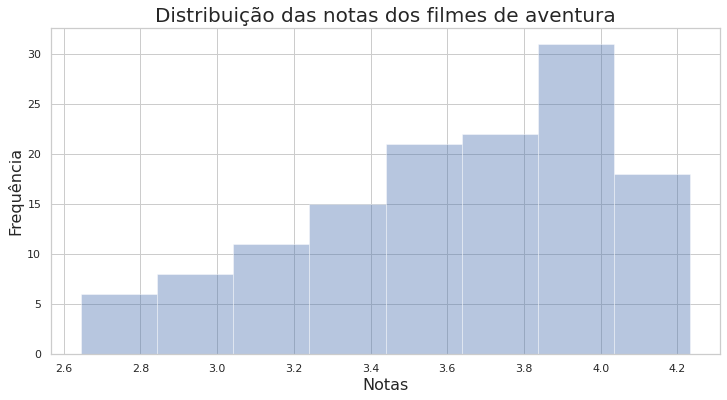

In [61]:
# solucao histograma de aventura
sns.set(style="whitegrid")
ax = sns.distplot(boxplot_filmes_adventure.nota_media, norm_hist=False, kde=False)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição das notas dos filmes de aventura', fontsize=20)
ax.set_xlabel('Notas', fontsize=16)
ax.set_ylabel('Frequência', fontsize=16)
ax

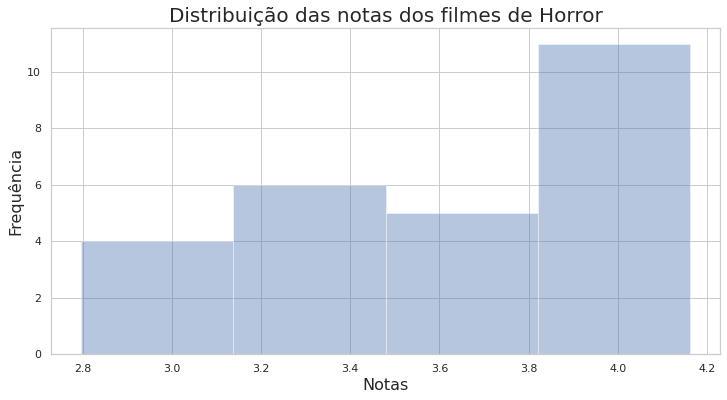

In [62]:
# solucao histograma de horror
sns.set(style="whitegrid")
ax = sns.distplot(boxplot_filmes_horror.nota_media, norm_hist=False, kde=False)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição das notas dos filmes de Horror', fontsize=20)
ax.set_xlabel('Notas', fontsize=16)
ax.set_ylabel('Frequência', fontsize=16)
ax

In [63]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo

_, p_valor_adventure = normaltest(boxplot_filmes_adventure.nota_media)
_, p_valor_horror = normaltest(boxplot_filmes_horror.nota_media)

print("P_valor gênero Aventura: ", p_valor_adventure)
print("P_valor gênero Horror: ", p_valor_horror)

P_valor gênero Aventura:  0.012835697582553224
P_valor gênero Horror:  0.21186284682483916


###As notas de Aventura não seguem uma distribuição normal, enquanto que as notas de Horror seguem. Utilizaremos um teste não paramétrico para comparar as duas, pois a amostra para os filmes de horror é pequena.


In [119]:
# solução com o teste desejado

_, p_valor = mannwhitneyu(boxplot_filmes_adventure.nota_media, boxplot_filmes_horror.nota_media)

print("P-valor: ", p_valor)

P-valor:  0.4164341323744339


## Sua recomendação para maior sucesso de crítica em nota alta entre `Horror` e `Adventure` continua a mesma? Explique.



### Não rejeitamos a hipótese nula, ou seja, não houveram indícios de que as notas médias dos gêneros de Aventura e Horror sejam diferentes. Sendo assim, continuaria recomendando um filme de Aventura.


## Pergunta: Quero fazer um filme que seja primeiro sucesso de crítica, com pessoas dando notas altas. Em segundo lugar quero que seja popular (mais pessoas assistam). Com as informações visuais e estatísticas, supondo poder escolher somente um, qual dois 2 gêneros você recomenda agora? `Horror` ou `Adventure`?

### Aventura



## Pergunta: Quais são os top 5 filmes dos 2 generos mais assistidas?

- utilize os 2 generos mais votados em `votos_por_genero`
- utilize a `nota_media` para definir o top 5 filmes
- o resultado são 5, não 10 filmes

In [64]:
# solução: calculando os 2 generos mais votados
qtd_votos_genero[0:2]

,Votos
Action,15734.0
Drama,15445.0


In [65]:
#Selecionando apenas os filmes que sejam de drama ou ação
votos_por_genero = filmes.query("Action == 1 or Drama == 1")

In [67]:
#Ordenando o dataframe de acordo com a nota_media 
votos_por_genero.sort_values(by="nota_media", ascending=False, inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [68]:
# solução: encontrando os top 5 filmes desses generos
votos_por_genero[["titulo", "nota_media"]][:5]

,titulo,nota_media
filmeId,,
318,"Shawshank Redemption, The (1994)",4.429022
858,"Godfather, The (1972)",4.289062
2959,Fight Club (1999),4.272936
1276,Cool Hand Luke (1967),4.271930
1221,"Godfather: Part II, The (1974)",4.259690


## Pergunta: Quais são os 2 generos com maior valor de correlação com a `nota_media`? E os 2 com menor valor de correlação com a `nota_media`?

- O pandas possui a função `corr` para calcular correlação entre todas as colunas

In [69]:
# solucao
generos_corr_nota_media = filmes.corr()[["nota_media"]][3:]
generos_corr_nota_media.sort_values(by = "nota_media", ascending = False, inplace = True)
generos_corr_nota_media

,nota_media
Drama,0.277662
Crime,0.190220
Mystery,0.129914
War,0.125615
FilmNoir,0.081766
IMAX,0.064931
Animation,0.043071
Documentary,-0.003486
Musical,-0.008529
Thriller,-0.016782


Os dois gêneros de filmes com maior correlação com a nota_media são Drama e Crime, e os dois com menor correlação são Ação e Comédia.


## Pergunta: Quais são os 2 generos com maior valor de correlação com `total_de_votos`? E quais os 2 com menor valor de correlação com `total_de_votos`?

In [70]:
# solucao
generos_corr_votos = filmes.corr()[["total_de_votos"]][3:]
generos_corr_votos.sort_values(by = "total_de_votos", ascending = False, inplace = True)
generos_corr_votos

,total_de_votos
Adventure,0.104380
War,0.087999
Thriller,0.085525
Crime,0.079766
Action,0.066239
SciFi,0.063802
Animation,0.023442
Drama,0.018779
Children,0.001764
Mystery,-0.007051


Os dois gêneros de filmes com maior correlação com o total de votos são Aventura e Guerra, e os dois com menor correlação são Ocidental e Comédia.

## Pergunta: Visualize graficamente o relacionamento entre ano de lançamento e nota média

- Use o gráfico `lineplot`

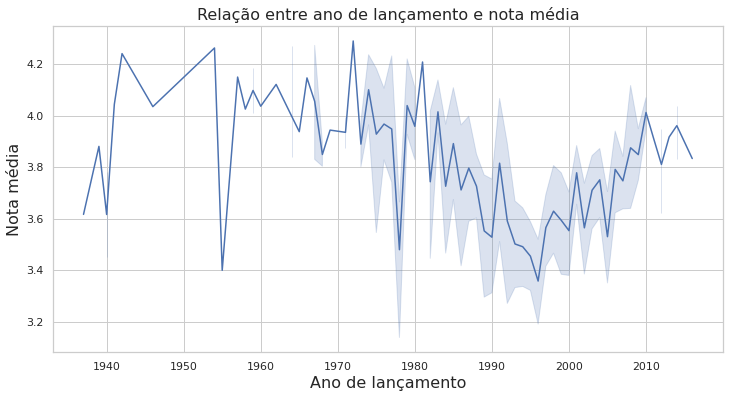

In [71]:
# solucao
sns.set(style="whitegrid")
ax =sns.lineplot(x = filmes.ano_de_lancamento, y = filmes.nota_media)

ax.figure.set_size_inches(12, 6)

ax.set_xlabel('Ano de lançamento', fontsize=16)
ax.set_ylabel('Nota média', fontsize=16)
ax.set_title("Relação entre ano de lançamento e nota média", fontsize = 16)
ax

## Pergunta: Interprete a correlação entre `ano_de_lancamento` e a `nota_media`?

- Calcule a correlação numericamente (use o `corr` do pandas)
- Correlação não implica causalidade, qual "problema" na coleta dos dados pode gerar esse tipo de correlação?

In [72]:
# solução (código)
filmes.corr()[["nota_media"]][0:1]

,nota_media
ano_de_lancamento,-0.159146


### Analisando a correlação entre ano de lançamento e nota média, pode-se concluir que existe uma correlação fraca e negativa entre as variáveis. Quanto mais recente a data de lançamento, menor a nota média.



## Pergunta: analise um pairplot

- crie uma variável chamada `infos` baseada nas colunas `ano_de_lancamento`, `nota_media` e `total_de_votos` de `filmes`
- faça o pairplot usando seaborn
- coloque uma regressão linear para cada pequeno plot dentro dele

In [73]:
# solução
infos = filmes[["ano_de_lancamento", "nota_media", "total_de_votos"]]

In [74]:
infos.corr()

,ano_de_lancamento,nota_media,total_de_votos
ano_de_lancamento,1.000000,-0.159146,-0.028709
nota_media,-0.159146,1.000000,0.342584
total_de_votos,-0.028709,0.342584,1.000000


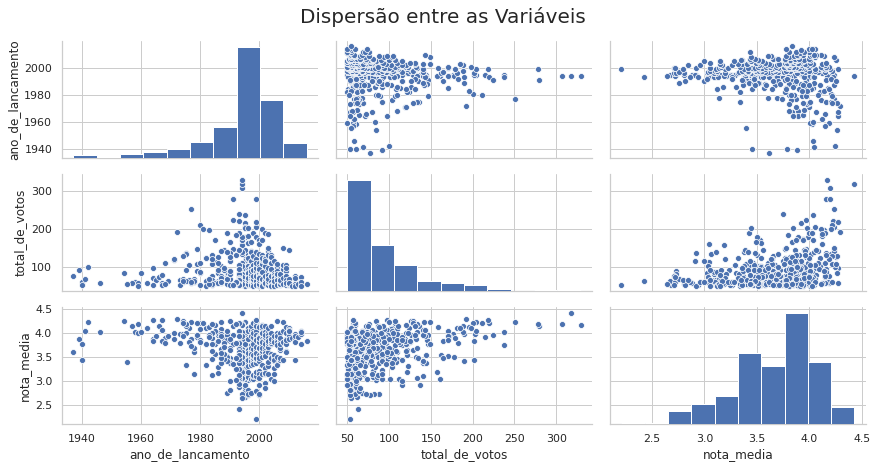

In [75]:
#Pairplot
sns.set(style="whitegrid")

ax = sns.pairplot(data = infos, y_vars=["ano_de_lancamento", "total_de_votos", "nota_media"], x_vars=["ano_de_lancamento", "total_de_votos", "nota_media"], aspect=2, height=2)

ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

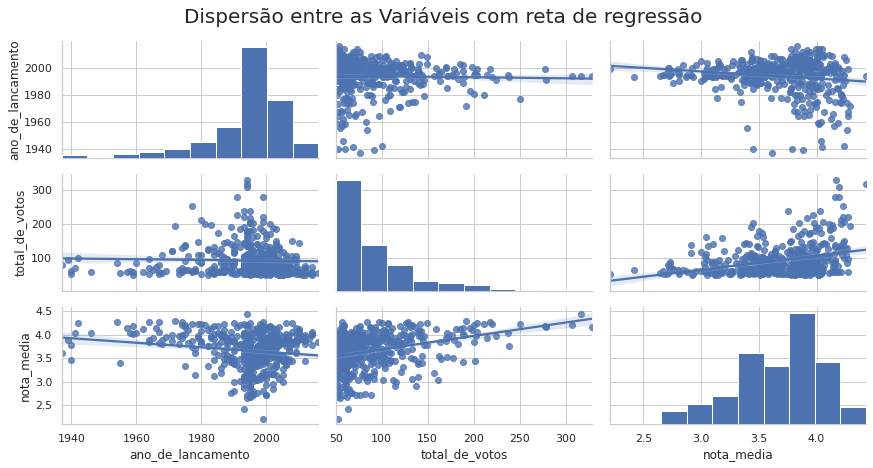

In [76]:
#Pairplot com regressão linear
sns.set(style="whitegrid")

ax = sns.pairplot(data = infos, y_vars=["ano_de_lancamento", "total_de_votos", "nota_media"], x_vars=["ano_de_lancamento", "total_de_votos", "nota_media"], aspect=2, height=2, kind="reg")

ax.fig.suptitle('Dispersão entre as Variáveis com reta de regressão', fontsize=20, y=1.05)
ax

## Pergunta: analise um pairplot dos filmes de `Animation`

- use o dataframe `filmes`
- em um único pairplot separe com cores distintas os filmes da categoria `Animation` dos outros
- use uma palete como `husl`
- use marcadores distintos para cada um dos dois grupos
- faça o pairplot usando seaborn e coloque uma regressão linear para cada pequeno plot dentro dele
- tanto em x quanto y use somente três variáveis: `total_de_votos`, `ano_de_lancamento`, `nota_media`

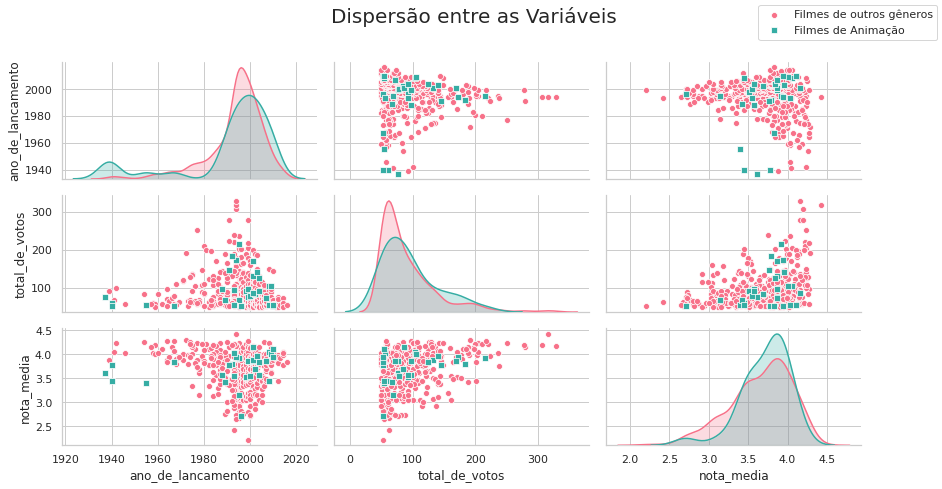

In [77]:
#Pairplot Animação x Outros gêneros
sns.set(style="whitegrid")

ax = sns.pairplot(data = filmes, y_vars=["ano_de_lancamento", "total_de_votos", "nota_media"], x_vars=["ano_de_lancamento", "total_de_votos", "nota_media"],
                  hue = "Animation", aspect=2, height=2, palette = "husl", markers=["o", "s"])

ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.1)
ax._legend.remove()
ax.fig.legend(labels = ["Filmes de outros gêneros", "Filmes de Animação"], loc = 'upper right', ncol =1)
ax

## Pergunta: Analise a regressão em relação ao ano de lançamento.

- Como parece se comportar a `nota_media` de filmes de `Animation` mais antigos e mais recentes? (ano_de_lancamento x nota_media). Essa correlação parece ser baixa, mas parece ser linear?
- E o `ano_de_lancamento` x `total_de_votos`?
- E das outras categorias? Compare isso com os outros filmes.
- O que leva você levantar como hipótese para esse resultado?

### Solução:
### - Analisando o gráfico de dispersão, os filmes de animação parecem manter uma nota média alta. Não parece haver uma correlação linear.
### - As variáveis ano de lançamento e total de votos não parecem ter uma correlação lineaar.
### - Tanto os filmes de animação quanto os de outros gêneros têm um comportamento muito parecido nos gráficos de dispersão.
### - Através dos gráficos de dispersão.


## Pergunta: Explore

- compartilhe conosco 2 visualizações extras que julgar interessante
- explique o que encontrou
- use quantas células (texto ou código) julgar necessário

In [78]:
#Criando uma nova variável Decada para analisar as notas médias dos filmes pelas décadas
decada_media = filmes[["ano_de_lancamento", "nota_media"]]

decada_media["Decada"] = pd.cut(decada_media.ano_de_lancamento, bins=[1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020], 
                                labels = ["1930/40", "1940/50", "1950/60", "1960/70", "1970/80", "1980/90", "1990/00", "2000/10", "2010/20"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


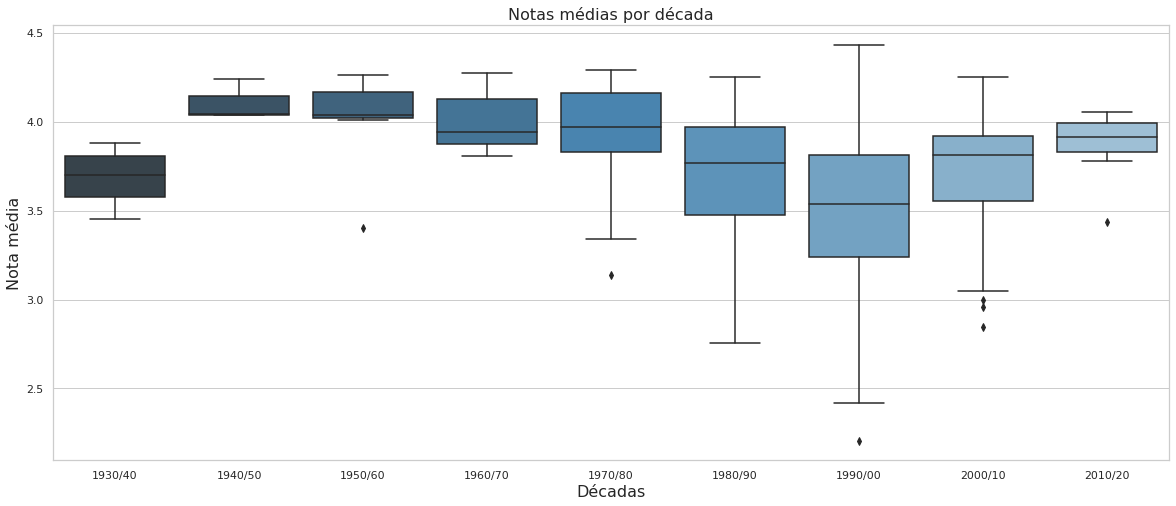

In [134]:
#Boxplot
sns.set(style="whitegrid")
ax = sns.boxplot(data = decada_media, x = 'Decada', y = 'nota_media', palette = "Blues_d", )

ax.figure.set_size_inches(20, 8)

ax.set_xlabel('Décadas', fontsize=16)
ax.set_ylabel('Nota média', fontsize=16)
ax.set_title("Notas médias por década", fontsize = 16)
ax

Podemos ver que os filmes das décadas de 40 e 50 possuem notas bem elevadas e concetradas, acima da nota 4. Os filmes lançados entre 1980 e 2010 possuem notas muito mais dispersas e abaixo de 4.

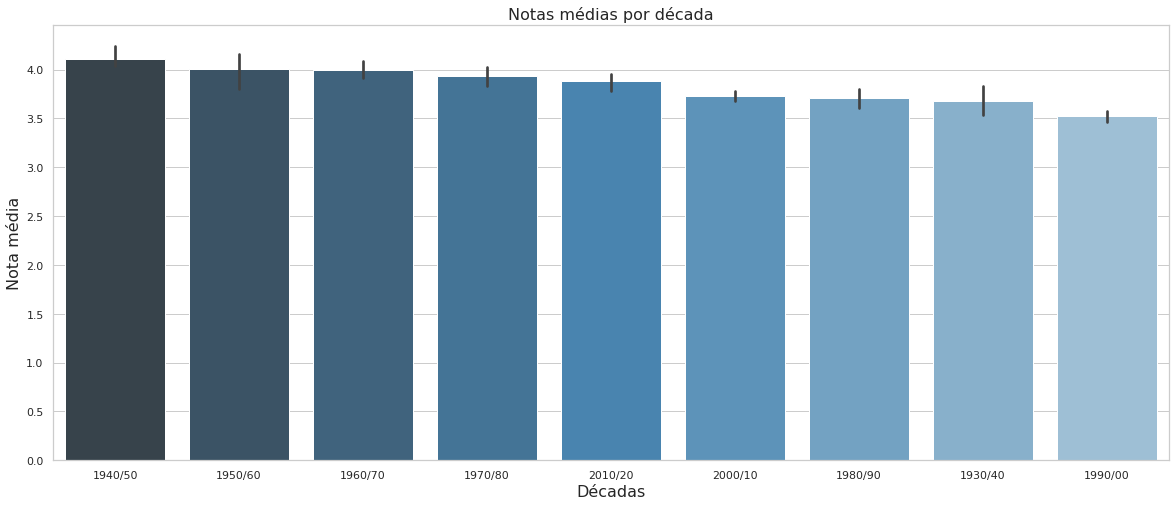

In [79]:
#Variável para ordenar as décadas de acordo com as notas médias
ordem = decada_media.groupby("Decada")["nota_media"].mean()
ordem.sort_values(ascending=False, inplace=True)

#Gráfico de barras
sns.set(style="whitegrid")
ax = sns.barplot(data = decada_media, x = 'Decada', y = 'nota_media', palette = "Blues_d", order=ordem.index)

ax.figure.set_size_inches(20, 8)

ax.set_xlabel('Décadas', fontsize=16)
ax.set_ylabel('Nota média', fontsize=16)
ax.set_title("Notas médias por década", fontsize = 16)
ax

Os filmes com notas mais elevadas são os lançados antes dos 80, os famosos clássicos.